## Data and libraries 

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))



In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Getting to know the data 

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

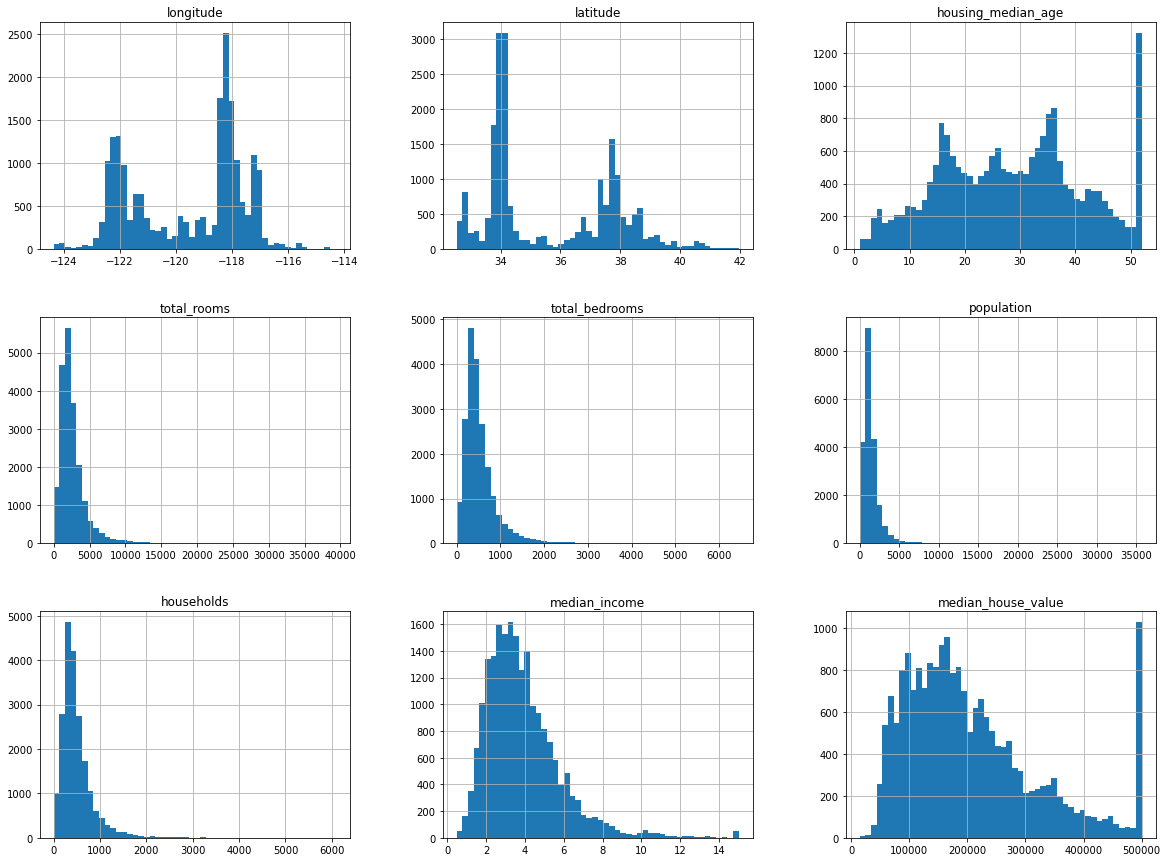

In [9]:
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))

In [10]:
housing['income_cat'] = pd.cut(housing['median_income']
                               , bins=[0,1.5,3,4.5,6,np.inf]
                               , labels=[1,2,3,4,5])

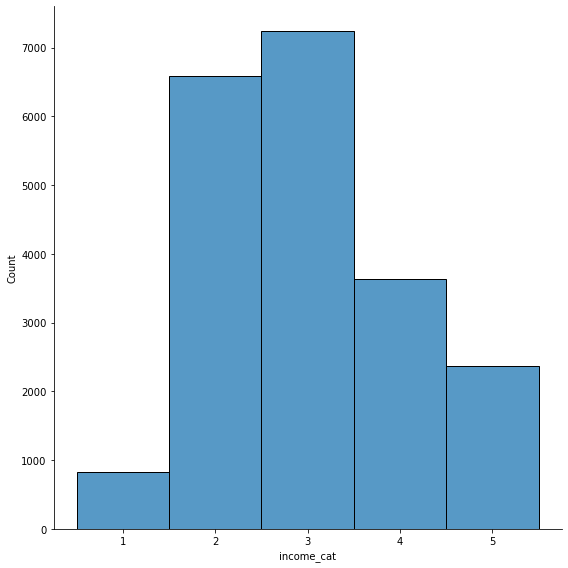

In [11]:
sns.displot(data=housing, x='income_cat', height=8)

## Stratified sampling for train test split 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [14]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

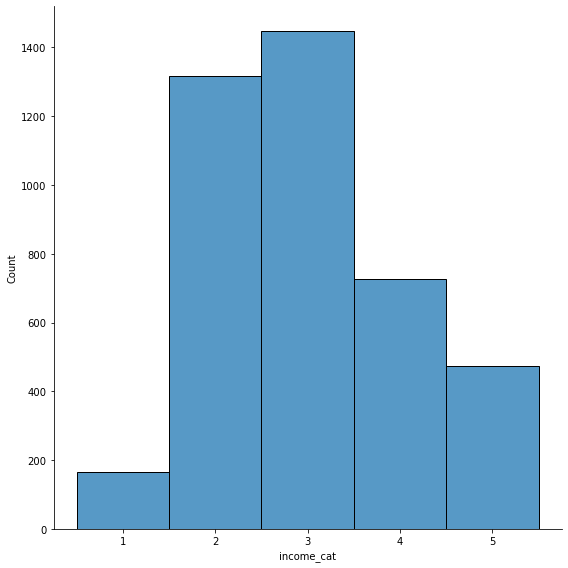

In [15]:
sns.displot(data=strat_test_set, x='income_cat', height=8)

In [16]:
strat_test_set.drop(columns='income_cat',axis=1,inplace=True)
strat_train_set.drop(columns='income_cat',axis=1,inplace=True)

## EDA 

In [17]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

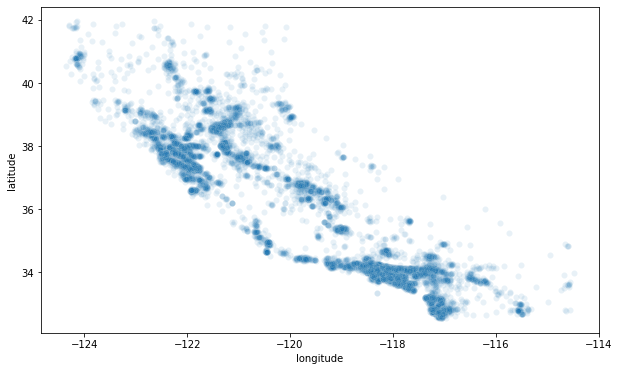

In [23]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=housing, x='longitude',y='latitude',alpha=0.1) # shouldn't it be the other way round? (Alpha for opacity)

No handles with labels found to put in legend.


<Figure size 720x504 with 0 Axes>

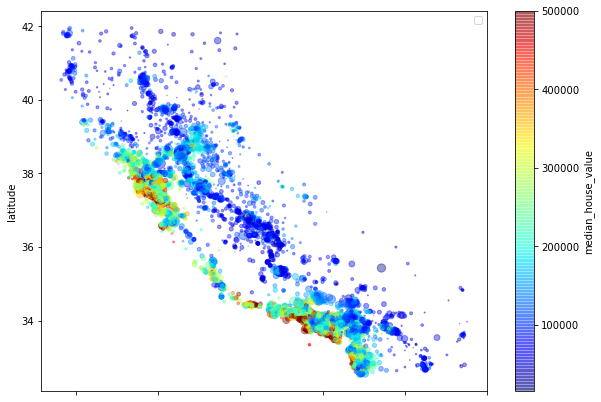

In [31]:
plt.figure(figsize=(10,7))
housing.plot(kind='scatter', x='longitude', y='latitude'
                , alpha=0.4
                , s=housing['population']/100
                , c='median_house_value', cmap=plt.get_cmap('jet')
                , figsize=(10,7))
plt.legend()

In [32]:
corr_matrix = housing.corr()

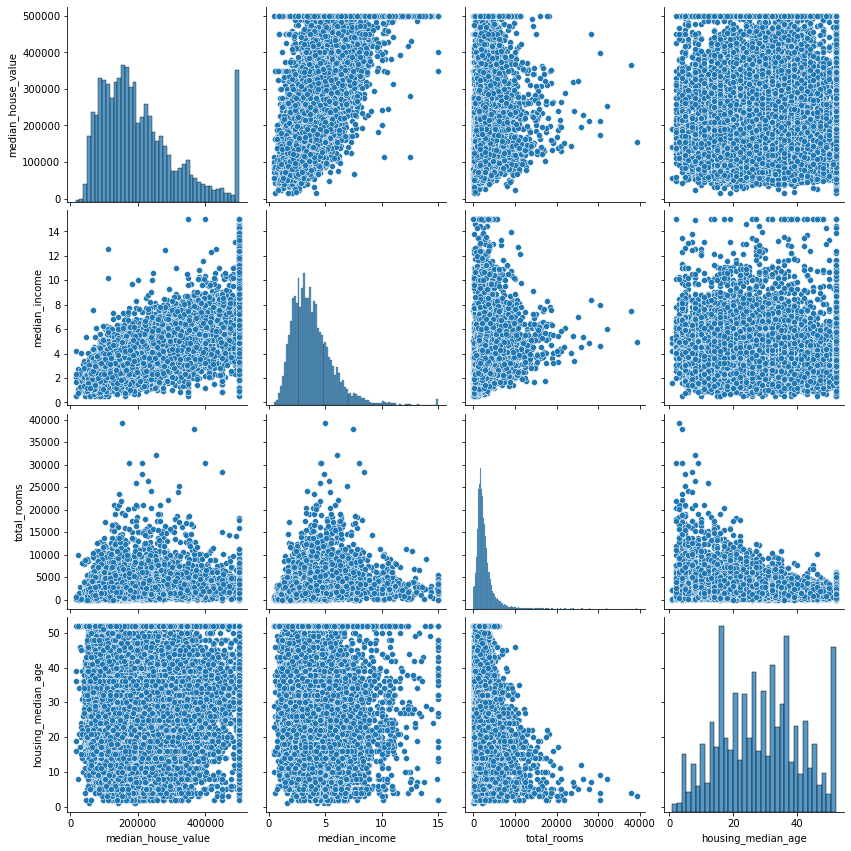

In [43]:
sns.pairplot(data=housing[['median_house_value','median_income','total_rooms','housing_median_age']], height=3)

### Few more features 

In [44]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

<AxesSubplot:>

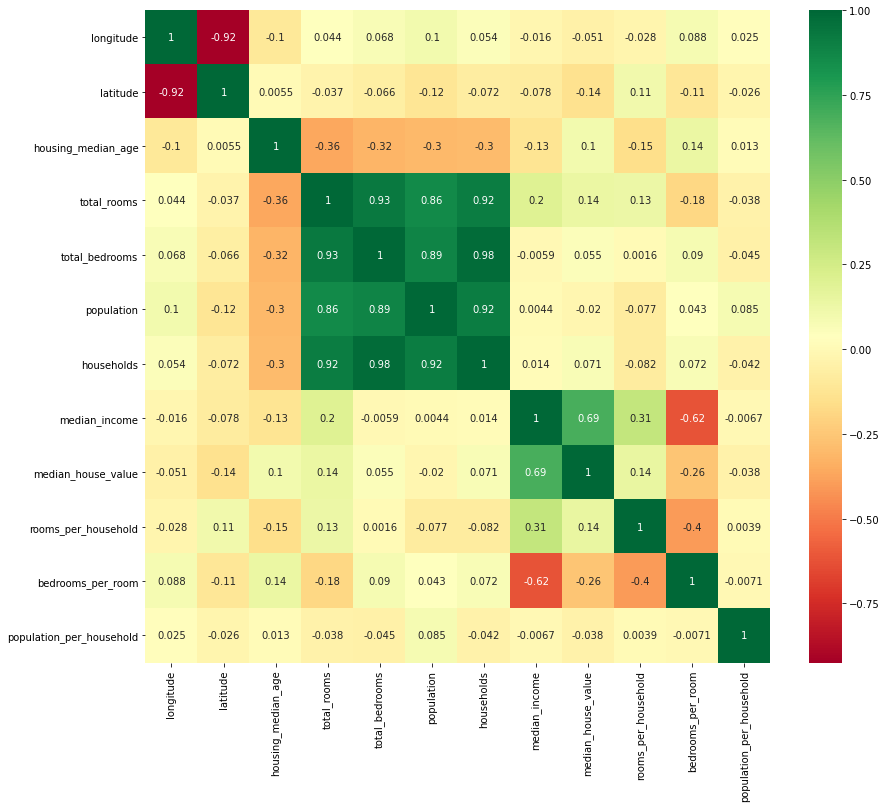

In [46]:
plt.figure(figsize=(14,12))
sns.heatmap(data=housing.corr(), annot=True, cmap='RdYlGn')

In [47]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
imputer = SimpleImputer(strategy='median')

In [50]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [51]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1167.     ,  408.5    ,    3.53825])

In [53]:
X = imputer.transform(housing_num)

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [55]:
housing.ocean_proximity.value_counts()

<1H OCEAN     7275
INLAND        5301
NEAR OCEAN    2088
NEAR BAY      1846
ISLAND           2
Name: ocean_proximity, dtype: int64

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
cat_encoder = OneHotEncoder()

In [60]:
housing_cat = housing[['ocean_proximity']]

In [61]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [62]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383
...,...,...,...,...,...,...,...,...
5215,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516
12228,-122.08,37.68,26.0,1167.0,370.0,253.0,137.0,2.4196
13741,-121.47,39.49,17.0,1554.0,242.0,553.0,230.0,3.2174
10730,-117.68,34.04,27.0,574.0,103.0,321.0,103.0,3.9107


In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

In [66]:
rooms_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        